In [31]:
import pandas as pd 

from collections import Counter

from itertools import chain

import random

from datetime import datetime

import matplotlib.pyplot as plt


In [35]:
path='/Users/oviya/Desktop/New/'

in_filename='appptest.xlsx'

in_sheet='Sheet1'

out_filename='outappstoregames.xlsx'

In [37]:
df = pd.read_excel(path+in_filename, sheet_name=in_sheet)
print(df)

                                                     URL          ID  \
0       https://apps.apple.com/us/app/sudoku/id284921427   284921427   
1      https://apps.apple.com/us/app/reversi/id284926400   284926400   
2      https://apps.apple.com/us/app/morocco/id284946595   284946595   
3      https://apps.apple.com/us/app/sudoku-free/id28...   285755462   
4      https://apps.apple.com/us/app/senet-deluxe/id2...   285831220   
...                                                  ...         ...   
16966  https://apps.apple.com/us/app/stack-puzzle-ris...  1474626442   
16967  https://apps.apple.com/us/app/eachother/id1474...  1474919257   
16968  https://apps.apple.com/us/app/rabbit-vs-tortoi...  1474962324   
16969  https://apps.apple.com/us/app/fatall/id1474963671  1474963671   
16970  https://apps.apple.com/us/app/the-three-kingdo...  1475076711   

                            Name                        Subtitle  \
0                         Sudoku                             NaN   

In [38]:
nulldf = df.dropna(axis = 0, how ='any') 

In [39]:
print("Total columns :",len(df.columns))

print("Total rows :",len(df))

print("total rows after remove of null data :",len(nulldf))

Total columns : 18
Total rows : 16971
total rows after remove of null data : 1932


In [40]:
#split the comma seperated column "geners"
out = nulldf['Genres'].str.split(',\s+', expand=True).stack().value_counts()

In [41]:
data_dict4 = out.to_dict() 



distinctofgeners=[]



for i,j in data_dict4.items():



    distinctofgeners.append(i)



print(distinctofgeners)

['Games', 'Strategy', 'Entertainment', 'Simulation', 'Role Playing', 'Action', 'Puzzle', 'Board', 'Casual', 'Card', 'Sports', 'Adventure', 'Education', 'Family', 'Lifestyle', 'Social Networking', 'Travel', 'Utilities', 'Trivia', 'Music', 'Word', 'Finance', 'Food & Drink', 'Racing', 'Books', 'Health & Fitness', 'Reference', 'Casino', 'Business', 'Productivity', 'News', 'Photo & Video', 'Magazines & Newspapers']


In [43]:
# make dataframe with distinct of geners
dfgrp = pd.DataFrame(distinctofgeners,columns =['Genres']) 
print(dfgrp)

                    Genres
0                    Games
1                 Strategy
2            Entertainment
3               Simulation
4             Role Playing
5                   Action
6                   Puzzle
7                    Board
8                   Casual
9                     Card
10                  Sports
11               Adventure
12               Education
13                  Family
14               Lifestyle
15       Social Networking
16                  Travel
17               Utilities
18                  Trivia
19                   Music
20                    Word
21                 Finance
22            Food & Drink
23                  Racing
24                   Books
25        Health & Fitness
26               Reference
27                  Casino
28                Business
29            Productivity
30                    News
31           Photo & Video
32  Magazines & Newspapers


In [44]:
#make dataframe with selected columns 



dfgroup = pd.DataFrame({'geners': [], 'userrating': [],'usercount':[], 'price': [],'dates':[]})



for geners,userrating,usercount,price,dates in zip(nulldf['Genres'],nulldf['Average User Rating'],nulldf['User Rating Count'],nulldf['Price'],nulldf['Original Release Date']): 



    for dgeners in dfgrp['Genres']:



       if str(dgeners) in str(geners):



            dfgroup = dfgroup.append({'geners': dgeners,'userrating': userrating,'usercount':usercount, 'price': price, 'dates': dates}, ignore_index=True)
print(dfgroup)            

             geners  userrating  usercount  price       dates
0             Games         3.0       47.0    0.0  30-07-2008
1          Strategy         3.0       47.0    0.0  30-07-2008
2     Entertainment         3.0       47.0    0.0  30-07-2008
3            Puzzle         3.0       47.0    0.0  30-07-2008
4             Games         3.5      357.0    0.0  24-09-2008
...             ...         ...        ...    ...         ...
6881          Board         4.5       51.0    0.0  29-07-2019
6882          Games         5.0       11.0    0.0  01-08-2019
6883       Strategy         5.0       11.0    0.0  01-08-2019
6884          Board         5.0       11.0    0.0  01-08-2019
6885      Utilities         5.0       11.0    0.0  01-08-2019

[6886 rows x 5 columns]


In [45]:
#Changing Original Release Date column with python dateformate:



dfgroup['dates']=pd.to_datetime(dfgroup['dates'], format='%d-%m-%Y')



dfgroup['year'] = dfgroup['dates'].dt.year



#get usercount by grouping geners and year



usrcount=dfgroup.groupby(['geners','year']).agg({'usercount': 'sum'})







usrcount1 = pd.DataFrame({'geners': [], 'year': [],'usercount':[]})



for index, row in dfgroup.iterrows(): 



          usrcount1 = usrcount1.append({'geners': row["geners"],'year':row["year"],'usercount':row["usercount"]}, ignore_index=True)



#get app rating by geners



usrrating = pd.DataFrame({'rating': [], 'geners': [],'userrating':[]})



for index, row in dfgroup.iterrows(): 



      if 1 <= row["userrating"] <2:



          #print (row["geners"], row["userrating"])



          usrrating = usrrating.append({'rating': '1-2','geners': row["geners"],'userrating':row["userrating"]}, ignore_index=True)



      if 2 <= row["userrating"] < 3:



          usrrating = usrrating.append({'rating': '2-3','geners': row["geners"],'userrating':row["userrating"]}, ignore_index=True)



      if 3 <= row["userrating"] < 4:



          usrrating = usrrating.append({'rating': '3-4','geners': row["geners"],'userrating':row["userrating"]}, ignore_index=True)



      if 4 <= row["userrating"] <= 5:



          usrrating = usrrating.append({'rating': '4-5','geners': row["geners"],'userrating':row["userrating"]}, ignore_index=True)



print(usrrating)

     rating         geners  userrating
0       3-4          Games         3.0
1       3-4       Strategy         3.0
2       3-4  Entertainment         3.0
3       3-4         Puzzle         3.0
4       3-4          Games         3.5
...     ...            ...         ...
6881    4-5          Board         4.5
6882    4-5          Games         5.0
6883    4-5       Strategy         5.0
6884    4-5          Board         5.0
6885    4-5      Utilities         5.0

[6886 rows x 3 columns]


In [46]:
#get app price by geners          



usrprice = pd.DataFrame({'prices': [], 'geners': [],'price':[]})



for index, row in dfgroup.iterrows(): 



      if 0.0 <= row["price"] < 1.0:



          #print (row["geners"], row["price"])



          usrprice = usrprice.append({'prices': '0.0-1.0','geners': row["geners"],'price':row["price"]}, ignore_index=True)



      if 1.0 <= row["price"] < 2.0:



          usrprice = usrprice.append({'prices': '1.0-2.0','geners': row["geners"],'price':row["price"]}, ignore_index=True)



      if 2.0 <= row["price"] < 3.0:



          usrprice = usrprice.append({'prices': '2.0-3.0','geners': row["geners"],'price':row["price"]}, ignore_index=True)



      if 4.0 <= row["price"] <= 5.0:



          usrprice = usrprice.append({'prices': '4.0-5.0','geners': row["geners"],'price':row["price"]}, ignore_index=True)



print(usrprice)

       prices         geners  price
0     0.0-1.0          Games    0.0
1     0.0-1.0       Strategy    0.0
2     0.0-1.0  Entertainment    0.0
3     0.0-1.0         Puzzle    0.0
4     0.0-1.0          Games    0.0
...       ...            ...    ...
6828  0.0-1.0          Board    0.0
6829  0.0-1.0          Games    0.0
6830  0.0-1.0       Strategy    0.0
6831  0.0-1.0          Board    0.0
6832  0.0-1.0      Utilities    0.0

[6833 rows x 3 columns]


In [48]:
writer = pd.ExcelWriter(path+out_filename, engine='xlsxwriter')
df.to_excel(writer, sheet_name='alldata',index=False)
nulldf.to_excel(writer, sheet_name='afternullremoved',index=False)
usrcount1.to_excel(writer, sheet_name='usrcount',index=False)
usrrating.to_excel(writer, sheet_name='usrrating',index=False)
usrprice.to_excel(writer, sheet_name='usrprice',index=False)
writer.save()

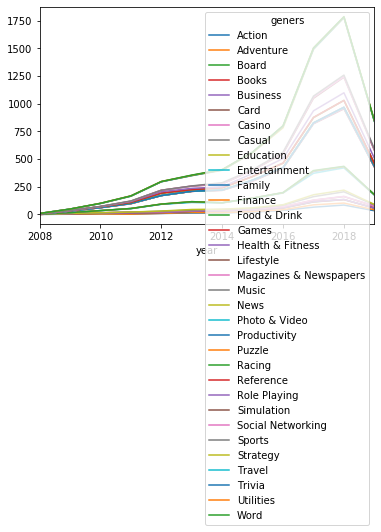

<Figure size 432x288 with 0 Axes>

In [61]:
usrcount1.groupby(['year','geners']).size().unstack().plot(kind='line',stacked=True)

plt.show()
plt.savefig(path+'usercount.png')

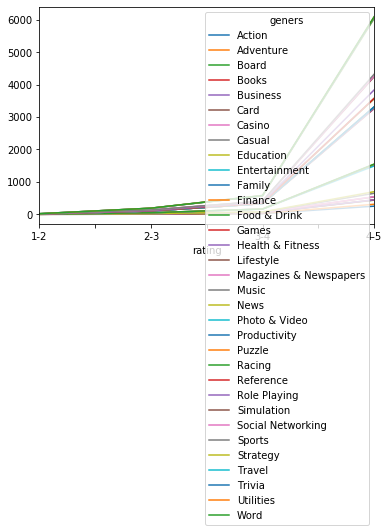

<Figure size 432x288 with 0 Axes>

In [62]:
usrrating.groupby(['rating','geners']).size().unstack().plot(kind='line',stacked=True)

plt.show()
plt.savefig(path+'userrating.png')

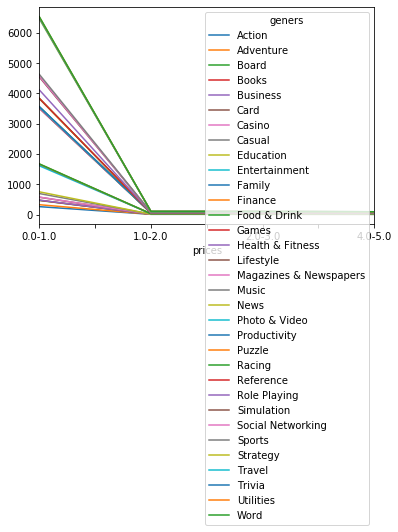

<Figure size 432x288 with 0 Axes>

In [63]:
usrprice.groupby(['prices','geners']).size().unstack().plot(kind='line',stacked=True)

plt.show()

plt.savefig(path+'price.png')